<a href="https://colab.research.google.com/github/karon999/math/blob/main/HW4_quad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below: \\
Peiyu Wang (pw2629)

# HW 4:  Numerical  Quadrature

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating
$$
 I[f] =  \int_a^b f(x) dx
$$
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule (a 1-point quadrature rule like  Mid-point, but evaluated at $x=a$, not the mid-point)
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [3]:
def I_left(f, a, b):
    """ Left rectangle rule """
    return f(a) * (b - a)

def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule """
    midpoint = (a + b) / 2
    return f(midpoint) * (b - a)

def I_trapezoid(f, a, b):
    """ Newton-Cotes Trapezoidal rule """
    return (f(a) + f(b)) / 2 * (b - a)

def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule """
    midpoint = (a + b) / 2
    return (b - a) / 6 * (f(a) + 4 * f(midpoint) + f(b))


In [4]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculate the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

The quadrature points $x_1, x_2, x_3$ are chosen as the roots of the Legendre polynomial $P_3(x) = \frac{5x^3 - 3x}{2}$. \\
Solving $P_3(x) = 0$ gives:
$x_1 = -\sqrt{\frac{3}{5}}, \quad x_2 = 0, \quad x_3 = \sqrt{\frac{3}{5}}$ \\
$\int_{-1}^1 f(x) \, dx \approx \sum_{i=1}^n w_i f(x_i)$ where the roots $x_i$ and weights $w_i$ are chosen.

For $f(x) = 1$: \\
$\int_{-1}^1 1 \, dx = 2 \Rightarrow w_1 \cdot 1 + w_2 \cdot 1 + w_3 \cdot 1 = 2$

For $f(x) = x$: \\
$\int_{-1}^1 x \, dx = 0 \Rightarrow w_1 x_1 + w_2 x_2 + w_3 x_3 = 0$

For $f(x) = x^2$: \\
$\int_{-1}^1 x^2 \, dx = \frac{2}{3} \Rightarrow w_1 x_1^2 + w_2 x_2^2 + w_3 x_3^2 = \frac{2}{3}$

Solving the functions, we find: \\
$w_1 = w_3 = \frac{5}{9}, w_2 = \frac{8}{9}$

Next, implement your 3-point GL quadrature scheme to approximate

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping).

In [8]:
def I_GL3(f, a, b):
    """ 3 point Gauss-Legendre Quadrature rule for an arbitrary interval x \in [a,b]"""
    roots = [-((3/5)**0.5), 0, (3/5)**0.5]
    weights = [5/9, 8/9, 5/9]

    midpoint = (a + b) / 2
    half_range = (b - a) / 2

    sum_int = sum(w * f(midpoint + half_range * x) for w, x in zip(weights, roots)) * half_range
    return sum_int

In [10]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules.

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above.

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [11]:
def quadN(f, a, b, N, method=I_midpoint):
    """
    integrate a function f over the interval x in [a,b] using
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N

    Parameters:
    -----------

    f:  function f(x) (type float)
    a: float
        left boundary of interval
    b: float
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule

    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx

    """
    h = (b - a) / N
    integral_sum = 0

    for n in range(N):
        x0 = a + n * h
        x1 = x0 + h
        integral_sum += method(f, x0, x1)

    return integral_sum


In [12]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )

answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')


N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).


This function should  make a single, beautiful log-log plot with the following information

* plot the *relative error* for each quadrature rule with respect to
$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$
for
$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

* a legend that labels each curve with the name of the method

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with

`name = method.__name__`


* the calculated rate of convergence of each  scheme.

Note, if we define the convergence behavior of the error as
$$
    |e| = C\Delta x^p
$$

calculate $C$ and $p$ for each method and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend).  Add the best fit value of $p$ to the legend.  Hint 2: be careful not to include floating point issues in your fit.

In [13]:
def plot_quad_convergence(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of
    various extended quadrature schemes vs panel spacing dx

    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters

    Parameters:
    -----------

    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)

    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled

    """
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson]

    plt.figure(figsize=(10, 6))

    for method in methods:
        relative_errors = []
        dx_values = []

        for n in N:
            dx = (b - a) / n
            I_computed = quadN(f, a, b, n, method=method)
            relative_error = abs((I_computed - I_true) / I_true)
            relative_errors.append(relative_error)
            dx_values.append(dx)

        log_dx = numpy.log(dx_values)
        log_errors = numpy.log(relative_errors)
        p, log_C = numpy.polyfit(log_dx, log_errors, 1)
        C = numpy.exp(log_C)

        plt.plot(dx_values, relative_errors, label=f"{method.__name__} (p ≈ {p:.2f})")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("log(Δx)")
    plt.ylabel("log(Relative Error)")
    plt.legend()
    plt.title(title if title else "Convergence of Quadrature Methods")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


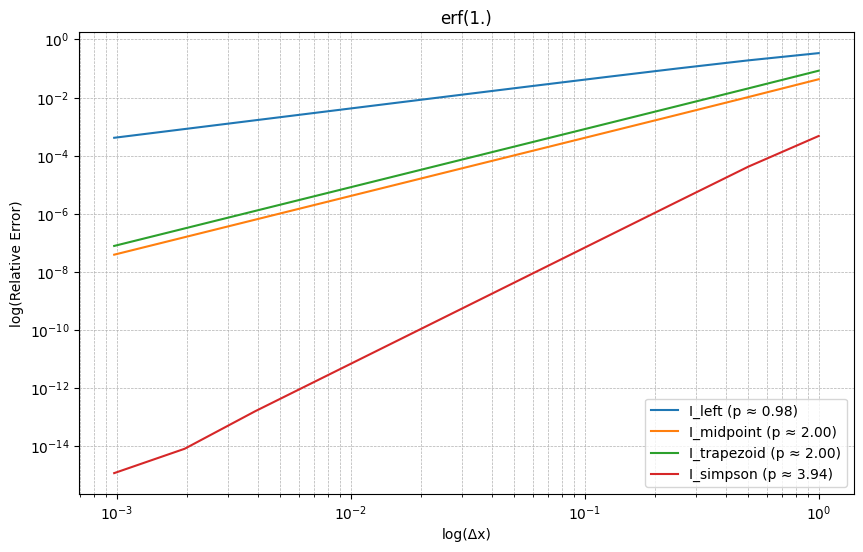

In [14]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of *function evaluations* required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


For the Mid-point Rule: \\
The mid-point rule has a convergence rate of $p = 2$, with an error of $O(h^2)$. \\
The required step size $ h \propto e^{1/p} = (10^{-7})^{1/2} = 10^{-3.5}$. \\
The required number of subintervals $ N \approx \frac{1}{h} = 10^{3.5} \approx 3162$. \\
Since the mid-point rule requires only one function evaluation per interval, the total function evaluations are approximately $3162$.

For the Simpson's Rule: \\
Simpson's rule has a convergence rate of $p = 4$, with an error of $O(h^4)$. \\
The step size $h \propto e^{1/p} = (10^{-7})^{1/4} = 10^{-1.75}$. \\
The required number of subintervals $N \approx \frac{1}{h} = 10^{1.75} \approx 56$. \\
Since the Simpson's rule requires 3 function evaluations per interval, the total function evaluations are approximately $56 \times 3 = 168$.

For the 3-Point Gauss-Legendre Quadrature: \\
The 3-point Gauss-Legendre quadrature has a convergence rate of $p = 4$, with an error of $O(h^4)$. \\
The step size $h \propto e^{1/p} = (10^{-7})^{1/4} = 10^{-1.75}$. \\
The required number of subintervals $N \approx \frac{1}{h} = 10^{1.75} \approx 56$. \\
Since the 3-point Gauss-Legendre quadrature requires 3 function evaluations per interval, the total function evaluations are approximately $56 \times 3 = 168$.


## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

At $ x = 0 $, the term $ \frac{1}{\sqrt{x}} $ becomes singular as $ x \to 0 $, leading to a potential divergence. This can cause numerical instability when evaluating the integrand near $ x = 0 $.

Therefore, $ x = 0 $ will be the problematic points of the integrals.

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$

In [15]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

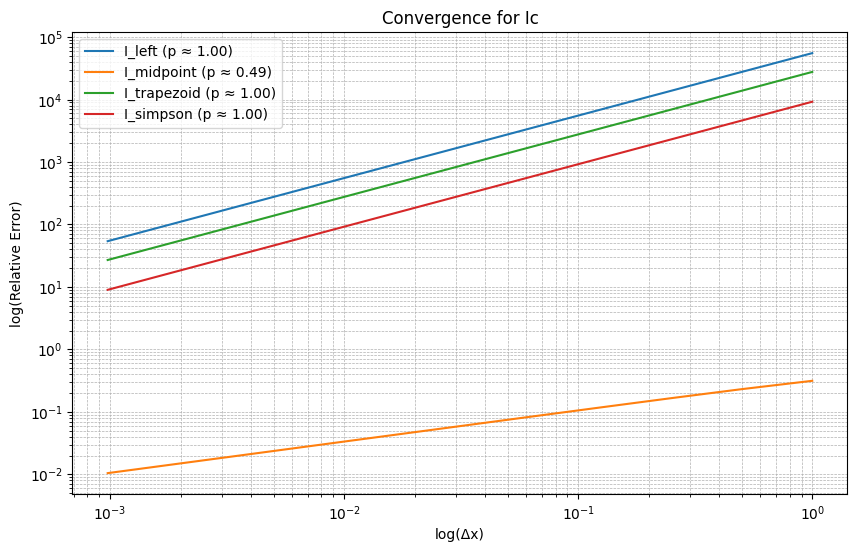

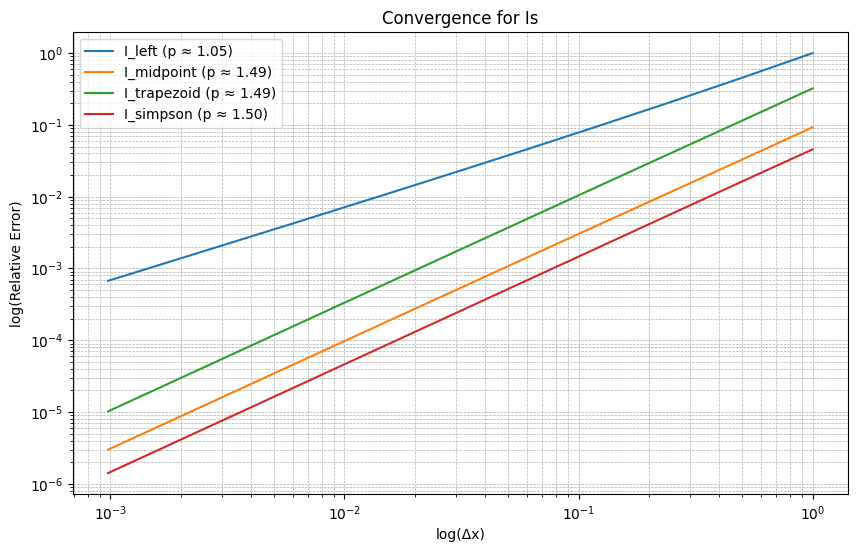

In [16]:
integrand_Ic = lambda x : numpy.cos(x) / numpy.sqrt(x)
integrand_Is = lambda x : numpy.sin(x) / numpy.sqrt(x)

N = [ 2**n for n in range (11)]

plot_quad_convergence(integrand_Ic, 1e-10, 1., N, Ic_true, title="Convergence for Ic")
plot_quad_convergence(integrand_Is, 1e-10, 1., N, Is_true, title="Convergence for Is")

**(c)**  [4] Explain the results of your plots

For standard numerical integration methods, the theoretical convergence rates are:
$\left\{ \begin{align}
Left Rectangle Rule: p = 1 \\
Midpoint Rule: p = 2 \\
Trapezoidal Rule: p = 2 \\
Simpson's Rule: p = 4
\end{align} \right.$

In the plots, the Left Rectangle Rule achieves the expected $p \approx 1$, as it is a lower-order method that is less sensitive to rapid changes near singularities.

But the observed convergence rates for other methods are lower than expected. For $I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx$, Midpoint, Trapezoidal, and Simpson's methods show convergence rates around $p = 1$.

This discrepancy is likely due to the singularity at $x = 0$, where $\frac{1}{x}$ becomes very large, leading to significant numerical errors near zero. This singularity diminishes the effectiveness of the higher-order methods, as they struggle to handle the rapid increase in values as $x \rightarrow 1$.

Also, the oscillations add another layer of complexity, as numerical integration methods have difficulty capturing the oscillations accurately, especially near the singularity. The combination of oscillations and the singularity significantly affects the convergence rates, making it difficult for even higher-order methods to reach their theoretical rates.

For $I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$, the convergence rates for these three methods are around $p = 1.5$, which is also lower than the expected, probably due to a similar reason.

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

For the integral
$I_c = \int_0^1 \frac{\cos x}{\sqrt{x}} \, dx$, substitute $ x = t^2 $ and $ dx = 2t \, dt $, \\
resulting in: $I_c = \int_0^1 \frac{\cos(t^2)}{\sqrt{t^2}} \cdot 2t \, dt = \int_0^1 2 \cos(t^2) \, dt$.

Similarly, $I_s = \int_0^1 2 \sin(t^2) \, dt$.


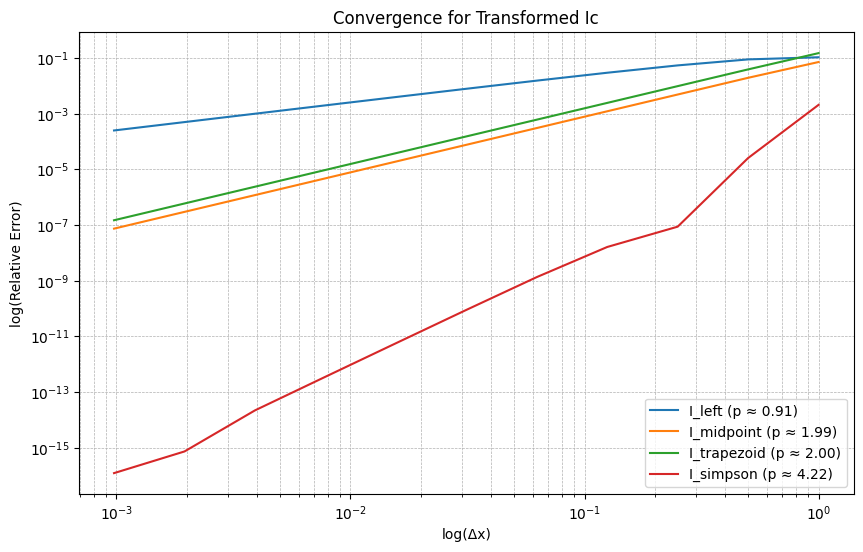

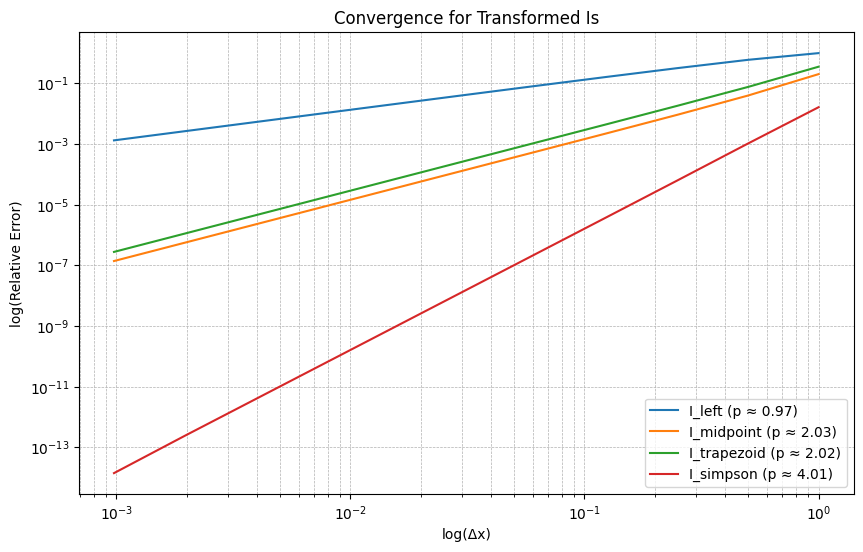

In [19]:
# YOUR CODE HERE
transformed_integrand_Ic = lambda t : 2 * numpy.cos(t**2)
transformed_integrand_Is = lambda t : 2 * numpy.sin(t**2)

N = [ 2**n for n in range (11)]

plot_quad_convergence(transformed_integrand_Ic, 0, 1., N, Ic_true, title="Convergence for Transformed Ic")
plot_quad_convergence(transformed_integrand_Is, 0, 1., N, Is_true, title="Convergence for Transformed Is")

The variable substitution has had a positive impact on the convergence of all quadrature methods for both integrals. It eliminats the singularity at
$x = 0$, making the integrand smoother and more regular across the interval. This allowed each method to reach or approach its theoretical convergence rate, showing the effectiveness of variable substitution in dealing with integrals that have singularities or other challenging behavior near boundaries.